In [ ]:
# I chose this my linear regression model on Taxi trip duration for two reasons. 
# First, is because the construction of railways and BRT will be evaluated based on different variables. 
# Secondly, because it is my work that relates to the project of interest and since we need to just pesent only one per language

In [59]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date
from datetime import timedelta

# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics 
# For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
lr=LinearRegression()



pd.set_option('display.max_columns', None)
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree
import pickle

In [60]:
dfO = pd.read_csv('Taxi_Trip_Duration.csv')
print ('Data loaded')

Data loaded


In [61]:
df = dfO.copy()
print (df.shape)
df.info()

(22699, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  flo

In [62]:
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,3/25/2017 8:55,3/25/2017 9:09,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,4/11/2017 14:53,4/11/2017 15:19,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26,12/15/2017 7:34,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,5/7/2017 13:17,5/7/2017 13:48,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,4/15/2017 23:32,4/15/2017 23:49,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,3/25/2017 20:34,3/25/2017 20:42,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,5/3/2017 19:04,5/3/2017 20:03,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,8/15/2017 17:41,8/15/2017 18:03,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,2/4/2017 16:17,2/4/2017 16:29,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 15:20,11/10/2017 15:40,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [63]:
print('Data type of tpep_dropoff_datetime:', df['tpep_dropoff_datetime'].dtype)
print('Data type of tpep_pickup_datetime:', df['tpep_pickup_datetime'].dtype)

Data type of tpep_dropoff_datetime: object
Data type of tpep_pickup_datetime: object


In [64]:
df['drop_off_converted'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%m/%d/%Y %H:%M')


In [67]:
df['pick_up_converted'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%m/%d/%Y %H:%M')


In [69]:
print('Data type of drop_off_converted:', df['drop_off_converted'].dtype)
print('Data type of pick_up_converted:', df['pick_up_converted'].dtype)

#to calculate trip duration
df['trip_duration'] = (df['drop_off_converted'] - df['pick_up_converted'])/np.timedelta64(1,'m')

Data type of drop_off_converted: datetime64[ns]
Data type of pick_up_converted: datetime64[ns]


In [70]:
#to displaz new colums added
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,drop_off_converted,pick_up_converted,trip_duration
0,24870114,2,3/25/2017 8:55,3/25/2017 9:09,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,2017-03-25 09:09:00,2017-03-25 08:55:00,14.0
1,35634249,1,4/11/2017 14:53,4/11/2017 15:19,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,2017-04-11 15:19:00,2017-04-11 14:53:00,26.0
2,106203690,1,12/15/2017 7:26,12/15/2017 7:34,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,2017-12-15 07:34:00,2017-12-15 07:26:00,8.0
3,38942136,2,5/7/2017 13:17,5/7/2017 13:48,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,2017-05-07 13:48:00,2017-05-07 13:17:00,31.0
4,30841670,2,4/15/2017 23:32,4/15/2017 23:49,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,2017-04-15 23:49:00,2017-04-15 23:32:00,17.0
5,23345809,2,3/25/2017 20:34,3/25/2017 20:42,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,2017-03-25 20:42:00,2017-03-25 20:34:00,8.0
6,37660487,2,5/3/2017 19:04,5/3/2017 20:03,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16,2017-05-03 20:03:00,2017-05-03 19:04:00,59.0
7,69059411,2,8/15/2017 17:41,8/15/2017 18:03,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58,2017-08-15 18:03:00,2017-08-15 17:41:00,22.0
8,8433159,2,2/4/2017 16:17,2/4/2017 16:29,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80,2017-02-04 16:29:00,2017-02-04 16:17:00,12.0
9,95294817,1,11/10/2017 15:20,11/10/2017 15:40,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55,2017-11-10 15:40:00,2017-11-10 15:20:00,20.0


In [36]:
df = pd.read_csv ('Taxi_Trip_Duration.csv')
print(df)

       Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0        24870114         2       3/25/2017 8:55        3/25/2017 9:09   
1        35634249         1      4/11/2017 14:53       4/11/2017 15:19   
2       106203690         1      12/15/2017 7:26       12/15/2017 7:34   
3        38942136         2       5/7/2017 13:17        5/7/2017 13:48   
4        30841670         2      4/15/2017 23:32       4/15/2017 23:49   
...           ...       ...                  ...                   ...   
22694    14873857         2      2/24/2017 17:37       2/24/2017 17:40   
22695    66632549         2       8/6/2017 16:43        8/6/2017 17:24   
22696    74239933         2       9/4/2017 14:54        9/4/2017 14:58   
22697    60217333         2      7/15/2017 12:56       7/15/2017 13:08   
22698    17208911         1       3/2/2017 13:02        3/2/2017 13:16   

       passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                    6           3.34  

In [71]:
#EDA
print('Shape of dataframe:', df.shape)
print('Shape of dataframe with duplicates dropped:', df.drop_duplicates().shape)

print ('Total count of missing values:', df.isna().sum().sum())
print ('Missing values per column:')
df.isna().sum()

Shape of dataframe: (22699, 21)
Shape of dataframe with duplicates dropped: (22699, 21)
Total count of missing values: 0
Missing values per column:


Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
drop_off_converted       0
pick_up_converted        0
trip_duration            0
dtype: int64

In [72]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,17.008723
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,61.996560
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,-17.000000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,7.000000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,11.000000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,18.000000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,1440.000000


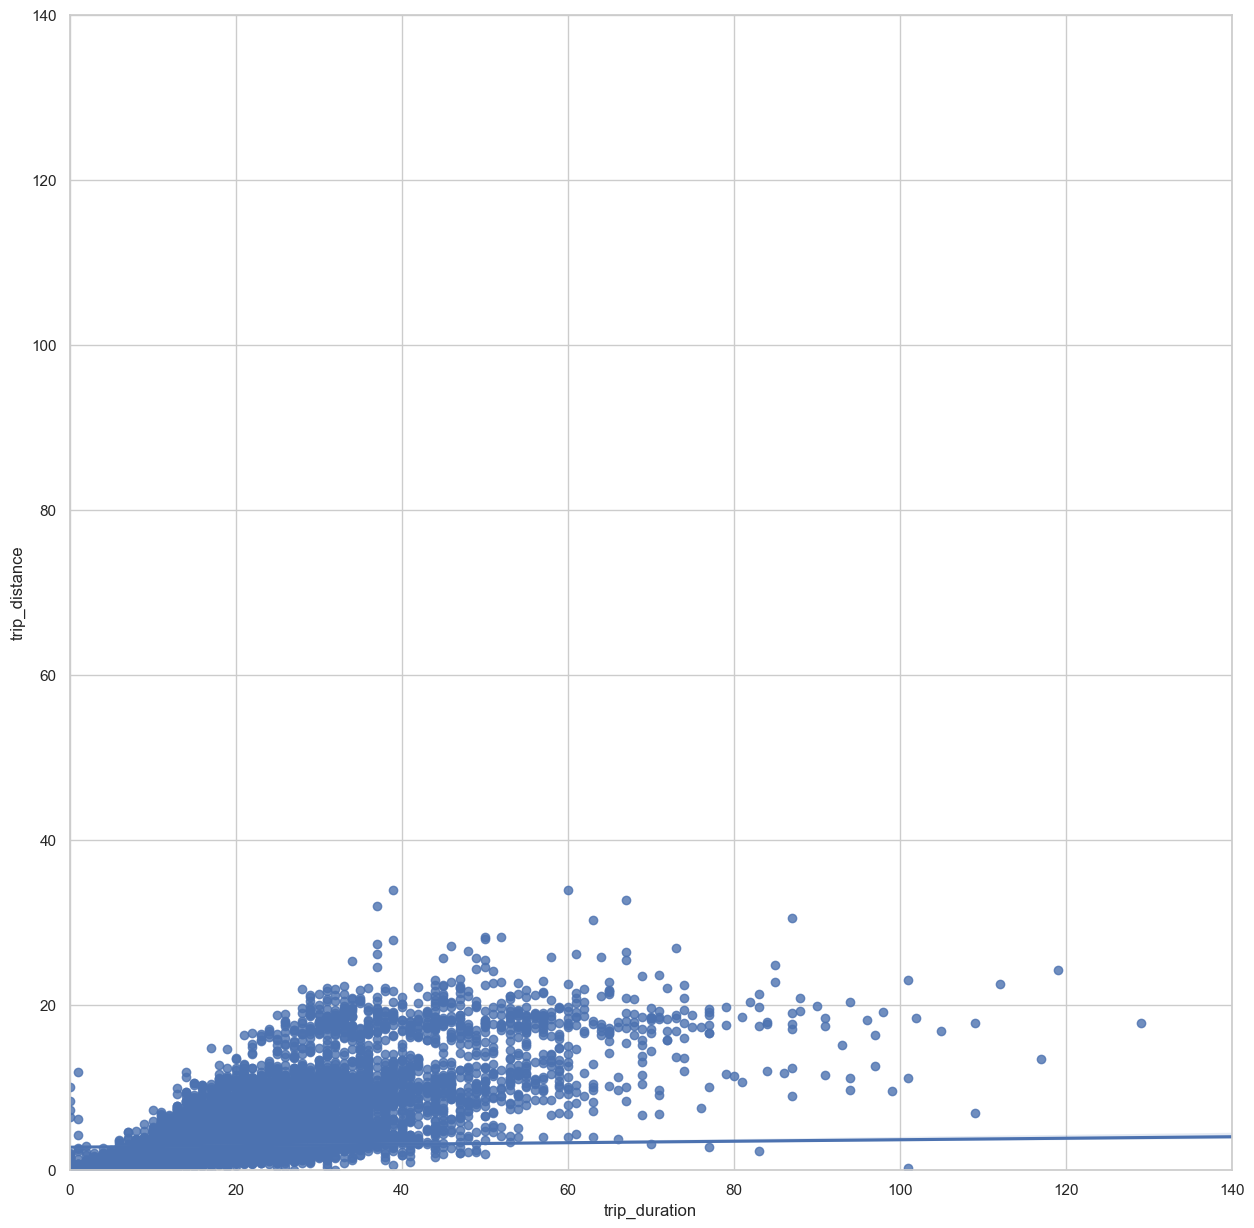

In [73]:
# to create a scatter plot of trip_duration and trip_distance with a line of best fit
sns.set(style='whitegrid')
f = plt.figure()
f.set_figheight(15)
f.set_figwidth(15)
sns.regplot(x=df['trip_duration'], y=df['trip_distance'])
plt.ylim(0, 140)
plt.xlim(0, 140)
plt.show()

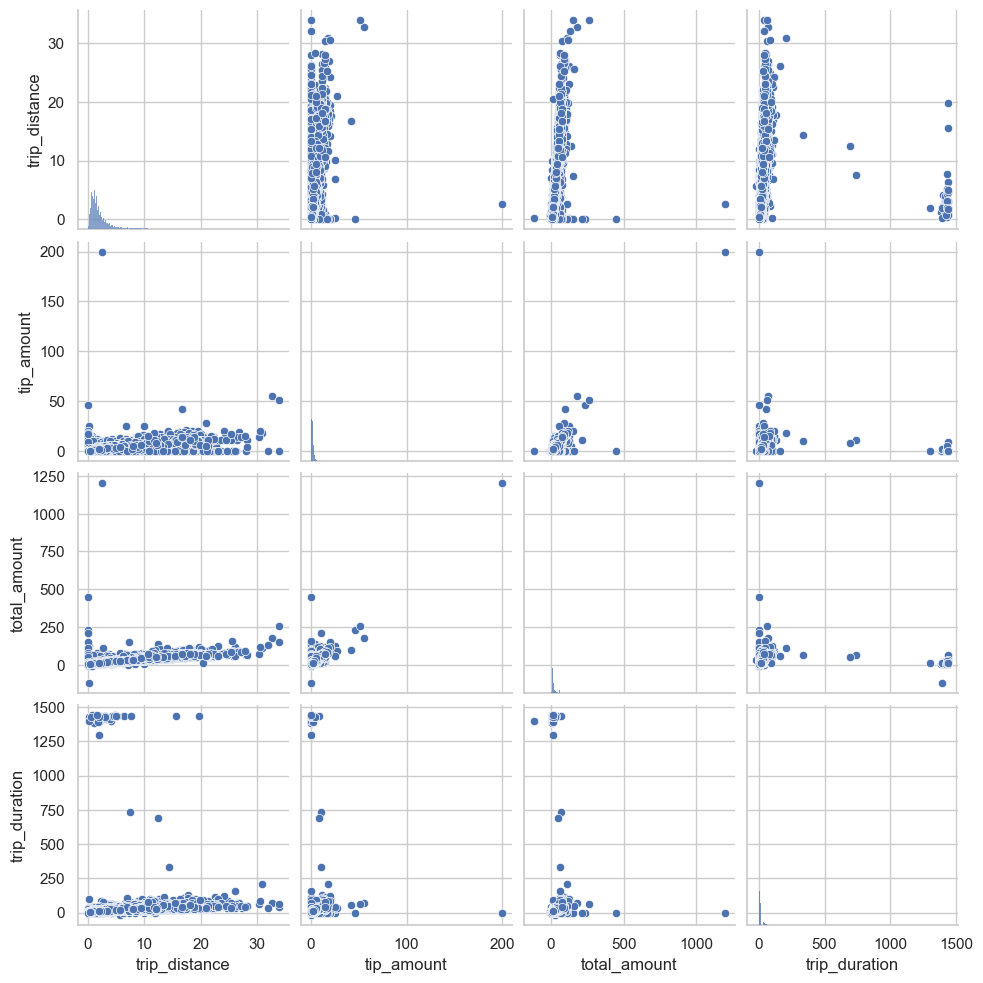

In [75]:
#to create pairplot to visualiye relationship between variables in the data
sns.pairplot(df[['trip_distance', 'tip_amount', 'total_amount', 'trip_duration']]);

Text(0.5, 1.0, '4 variables with outliers')

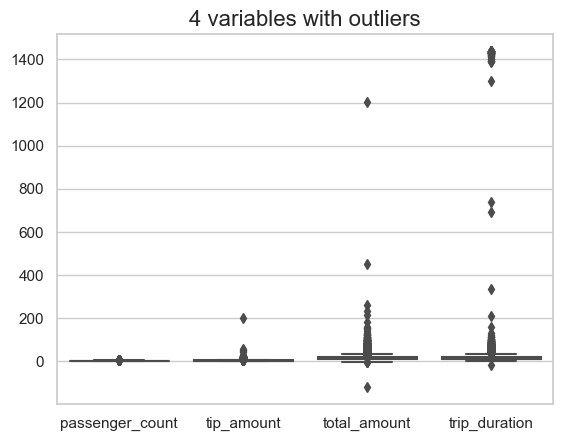

In [78]:
# to Visualize outlier
g = sns.boxplot(data=df[['passenger_count', 'tip_amount', 'total_amount', 'trip_duration']], showfliers=True);
g.set_title('4 variables with outliers', fontsize=16)

Text(0.5, 1.0, '4 Variables without Outliers')

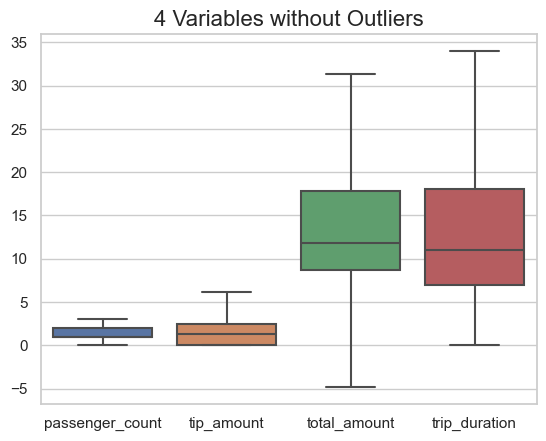

In [79]:
#to visulaize the distribution of the data without outliers
g = sns.boxplot(data=df[["passenger_count","tip_amount","total_amount", "trip_duration"]], showfliers=False);
g.set_title("4 Variables without Outliers",fontsize=16)

In [80]:
#Removing Outliers
percentile25 = df["trip_duration"].quantile(0.25)
percentile75 = df["trip_duration"].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
upper_limit

34.5

In [81]:
df[df["trip_duration"] > 36] = 36 # Set val
df[df["trip_duration"] < 0] = 0

df["trip_duration"].describe()

count    22699.000000
mean        13.663686
std          9.254188
min          0.000000
25%          7.000000
50%         11.000000
75%         18.000000
max         36.000000
Name: trip_duration, dtype: float64

In [82]:
percentile25 = df["total_amount"].quantile(0.25)
percentile75 = df["total_amount"].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
upper_limit

31.375

In [83]:
df[df["total_amount"] > 32] = 32
df[df["total_amount"] < 0] = 0

df["total_amount"].describe()

count    22699.000000
mean        14.478729
std          7.981224
min          0.000000
25%          8.750000
50%         11.800000
75%         17.800000
max         32.000000
Name: total_amount, dtype: float64

In [84]:
#Correlation matrix to help determine best correalted variable
df.corr(method="pearson")

C:\Users\wuch1615\AppData\Local\Temp\ipykernel_14212\2849374429.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method="pearson")


,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
Unnamed: 0,1.000000,-0.480352,-0.476459,-0.476197,-0.481048,0.245243,0.250318,-0.480212,-0.386649,-0.481011,-0.481147,-0.476850,-0.481163,-0.481169,-0.349756,-0.309033
VendorID,-0.480352,1.000000,0.991809,0.986387,0.998622,-0.525293,-0.512225,0.997359,0.814052,0.998006,0.998684,0.988978,0.998259,0.998683,0.736321,0.673751
passenger_count,-0.476459,0.991809,1.000000,0.979355,0.991223,-0.521025,-0.507229,0.990115,0.808990,0.990576,0.991297,0.981527,0.990888,0.991297,0.731639,0.670005
trip_distance,-0.476197,0.986387,0.979355,1.000000,0.987438,-0.527592,-0.518649,0.986073,0.887596,0.987081,0.987574,0.985181,0.987646,0.987569,0.821739,0.747596
RatecodeID,-0.481048,0.998622,0.991223,0.987438,1.000000,-0.525036,-0.512051,0.998661,0.815310,0.999235,0.999911,0.990265,0.999529,0.999923,0.737534,0.674577
PULocationID,0.245243,-0.525293,-0.521025,-0.527592,-0.525036,1.000000,0.343807,-0.524588,-0.455797,-0.525037,-0.525102,-0.520802,-0.525127,-0.525134,-0.416848,-0.377790
DOLocationID,0.250318,-0.512225,-0.507229,-0.518649,-0.512051,0.343807,1.000000,-0.511868,-0.455731,-0.512387,-0.512014,-0.509084,-0.512371,-0.512051,-0.420300,-0.379154
payment_type,-0.480212,0.997359,0.990115,0.986073,0.998661,-0.524588,-0.511868,1.000000,0.813060,0.997986,0.998713,0.984193,0.998325,0.998716,0.729607,0.672512
fare_amount,-0.386649,0.814052,0.808990,0.887596,0.815310,-0.455797,-0.455731,0.813060,1.000000,0.814782,0.815151,0.837334,0.816067,0.815157,0.980789,0.940868
extra,-0.481011,0.998006,0.990576,0.987081,0.999235,-0.525037,-0.512387,0.997986,0.814782,1.000000,0.999322,0.989923,0.998910,0.999322,0.738964,0.674515


C:\Users\wuch1615\AppData\Local\Temp\ipykernel_14212\2746129664.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method="pearson"), annot=True, cmap="Blues") #cmap="crest")


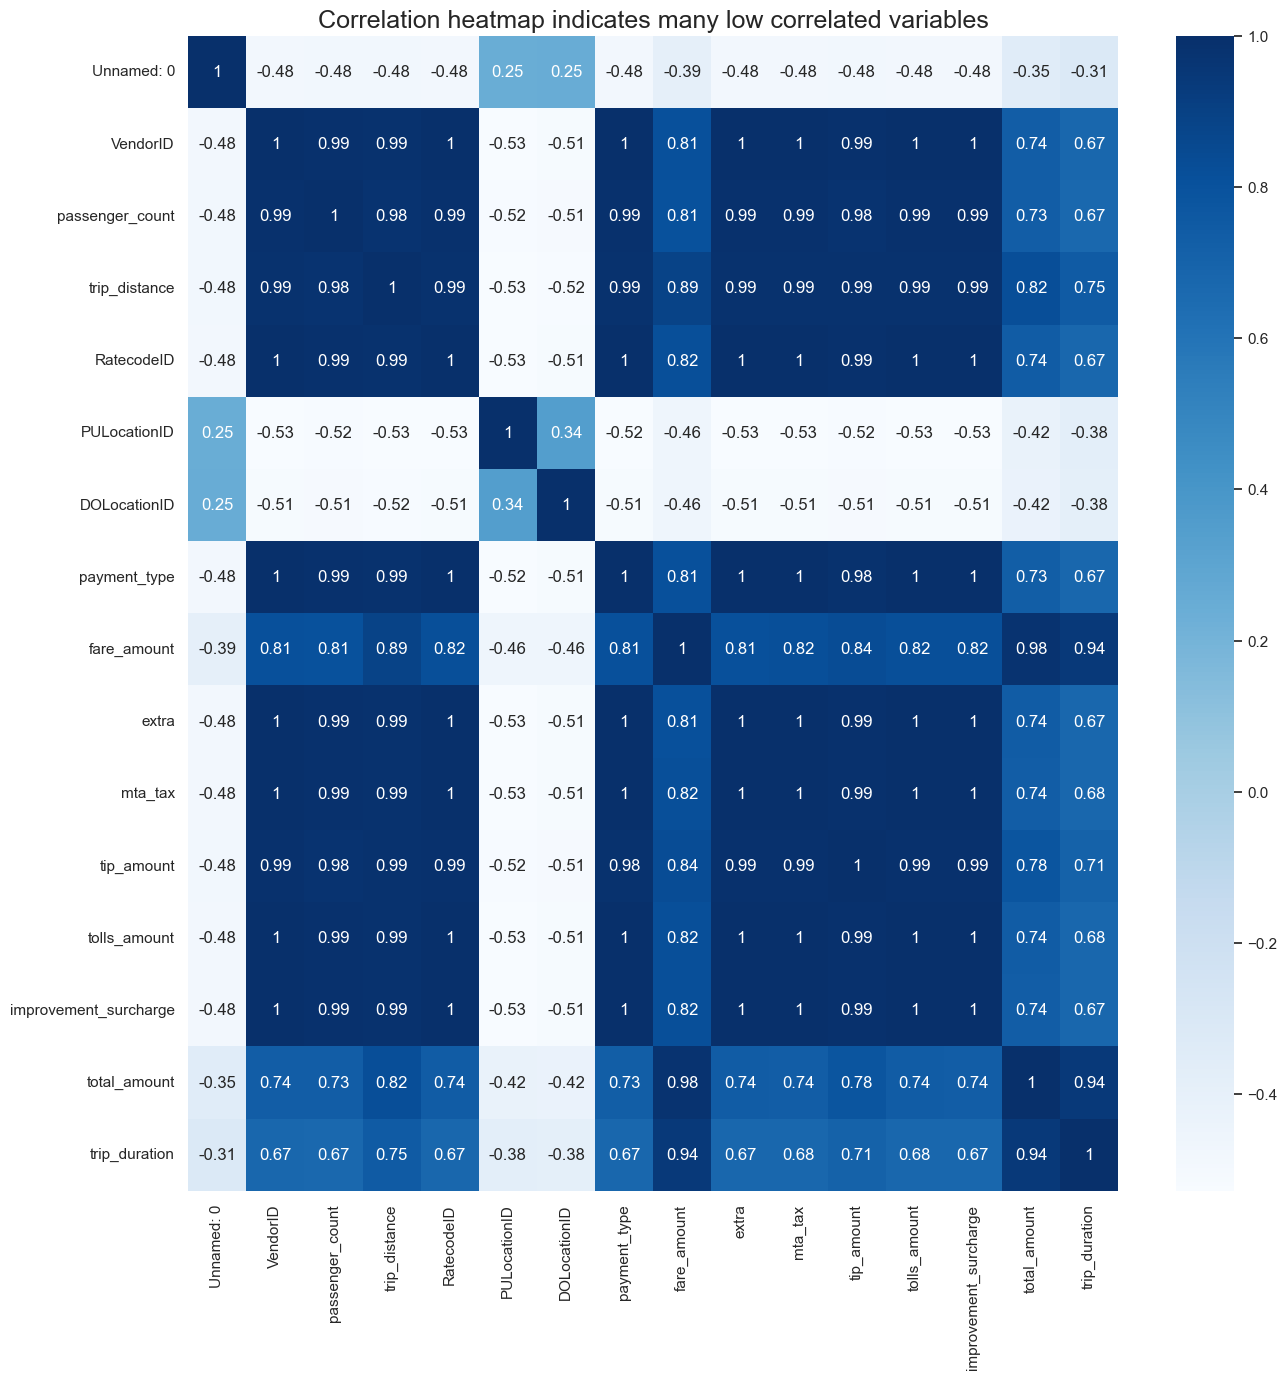

18

In [85]:
# To visualise correlation heat map
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(method="pearson"), annot=True, cmap="Blues") #cmap="crest")
plt.title("Correlation heatmap indicates many low correlated variables", fontsize=18)
plt.show()
18

In [86]:
Y = df[["trip_duration"]]

X = df.drop(columns="trip_duration")
X.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,drop_off_converted,pick_up_converted
0,24870114,2,3/25/2017 8:55,3/25/2017 9:09,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,2017-03-25 09:09:00,2017-03-25 08:55:00
1,35634249,1,4/11/2017 14:53,4/11/2017 15:19,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,2017-04-11 15:19:00,2017-04-11 14:53:00
2,106203690,1,12/15/2017 7:26,12/15/2017 7:34,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,2017-12-15 07:34:00,2017-12-15 07:26:00
3,38942136,2,5/7/2017 13:17,5/7/2017 13:48,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,2017-05-07 13:48:00,2017-05-07 13:17:00
4,30841670,2,4/15/2017 23:32,4/15/2017 23:49,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,2017-04-15 23:49:00,2017-04-15 23:32:00


In [87]:
columns_to_drop = ['tpep_pickup_datetime', 'tpep_dropoff_datetime','store_and_fwd_flag', 'passenger_count', 'VendorID','fare_amount', 'PULocationID', 'DOLocationID','total_amount','drop_off_converted', 'pick_up_converted']
X = X.drop(columns_to_drop, axis=1)
X = X.loc[:, ~X.columns.str.contains("Unnamed")]
X.head()

,trip_distance,RatecodeID,payment_type,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge
0,3.34,1,1,0.0,0.5,2.76,0.0,0.3
1,1.80,1,1,0.0,0.5,4.00,0.0,0.3
2,1.00,1,1,0.0,0.5,1.45,0.0,0.3
3,3.70,1,1,0.0,0.5,6.39,0.0,0.3
4,4.37,1,2,0.5,0.5,0.00,0.0,0.3


In [88]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("X scaled:", X_scaled)

X scaled: [[-0.18035575 -0.33618447 -0.37233967 ... -0.18408591 -0.33725472
  -0.33583702]
 [-0.34804254 -0.33618447 -0.37233967 ... -0.05123384 -0.33725472
  -0.33583702]
 [-0.43515255 -0.33618447 -0.37233967 ... -0.32443769 -0.33725472
  -0.33583702]
 ...
 [-0.49830731 -0.33618447 -0.26440748 ... -0.4797889  -0.33725472
  -0.33583702]
 [-0.28706552 -0.33618447 -0.37233967 ... -0.297653   -0.33725472
  -0.33583702]
 [-0.31537628 -0.33618447 -0.37233967 ... -0.2280128  -0.33725472
  -0.33583702]]


In [89]:
#Building the model
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=0)

In [90]:
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [91]:
# Model Evaluation
r_sq = lr.score(X_train, Y_train)
print("Coefficient of determination:", r_sq)
Y_pred = lr.predict(X_train)
print("R^2:", r2_score(Y_train, Y_pred))
print("MAE:", mean_absolute_error(Y_train,Y_pred))
print("RMSE:",np.sqrt(mean_squared_error(Y_train, Y_pred)))

Coefficient of determination: 0.7429168111442531
R^2: 0.7429168111442531
MAE: 3.2405134739473374
RMSE: 4.614843925967831


In [93]:
r_sq_test = lr.score(X_test, Y_test)
print("Coefficient of determination:", r_sq_test)
Y_pred_test = lr.predict(X_test)
print("R^2:", r2_score(Y_test, Y_pred_test))
print("MAE:", mean_absolute_error(Y_test,Y_pred_test))
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_test)))

Coefficient of determination: 0.7368339525884522
R^2: 0.7368339525884522
MAE: 3.2538151279171306
RMSE: 4.632230695076401


In [ ]:
The model performance is similar across both training and test sets, suggesting that there is no
bias in the model and that the model is not overfit

In [94]:
results = pd.DataFrame(data={"actual": Y_test["trip_duration"], "predicted": Y_pred_test.ravel()})
results["residual"] = results["actual"] - results["predicted"]
results.head()

,actual,predicted,residual
5818,18.0,15.675123,2.324877
18134,32.0,32.000118,-0.000118
4655,6.0,7.328350,-1.328350
7378,16.0,18.358000,-2.358000
13914,11.0,11.550253,-0.550253


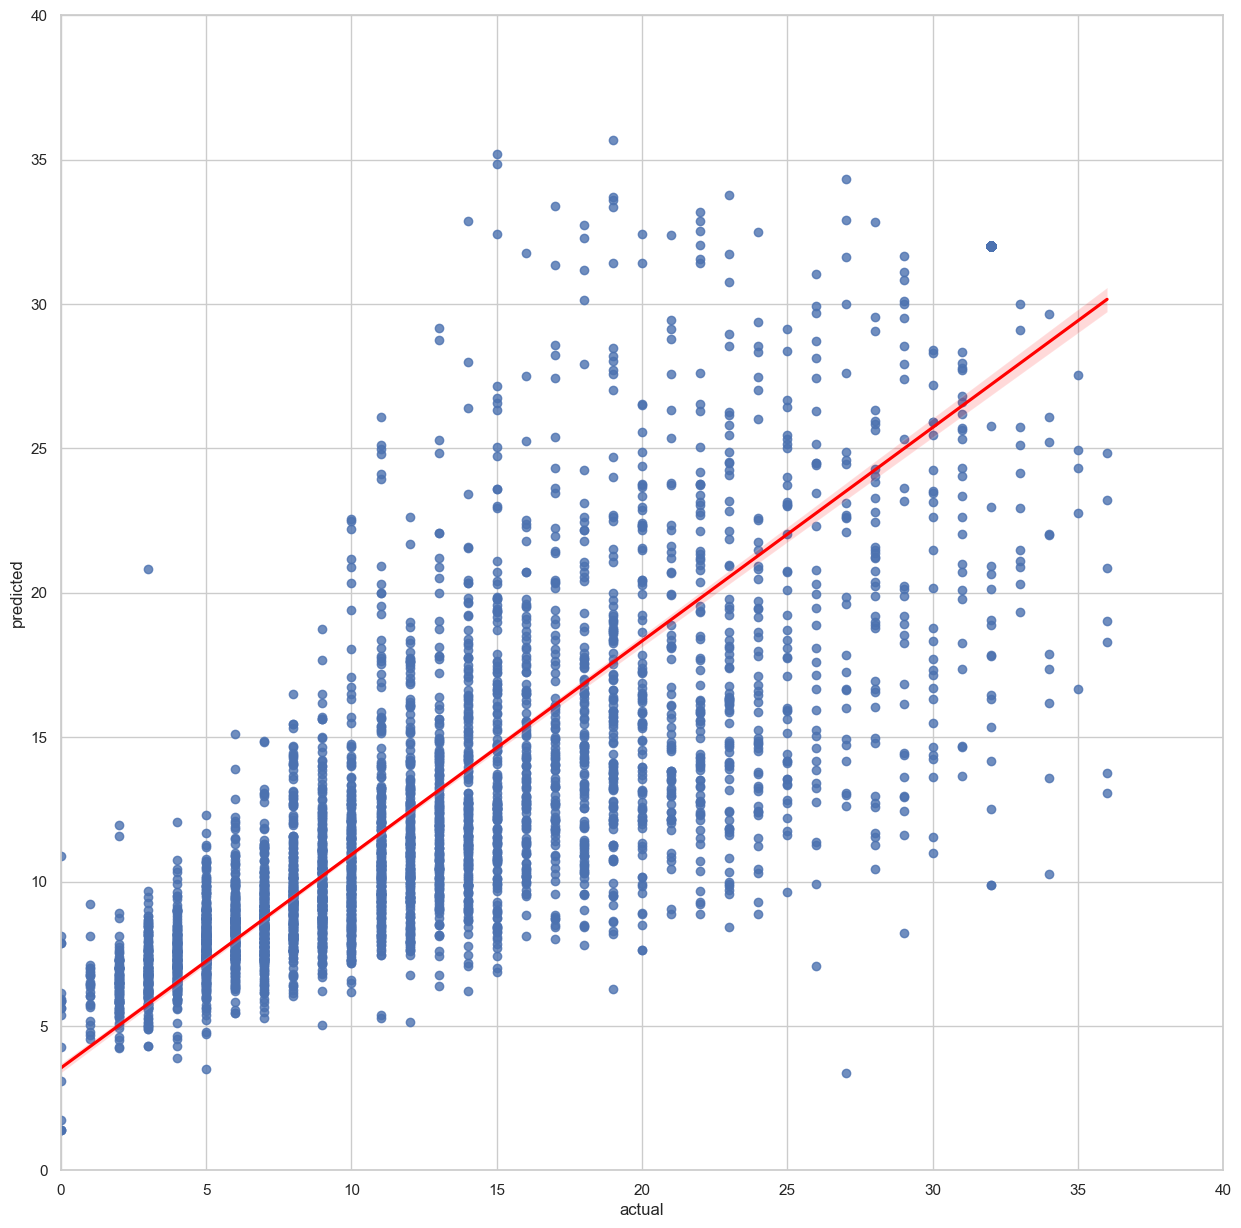

In [95]:
#to visualise predicted over actual
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)
sns.regplot(x="actual",
y="predicted",
data=results, line_kws={"color": "red"})
plt.ylim(0, 40)
plt.xlim(0,40)
plt.show()

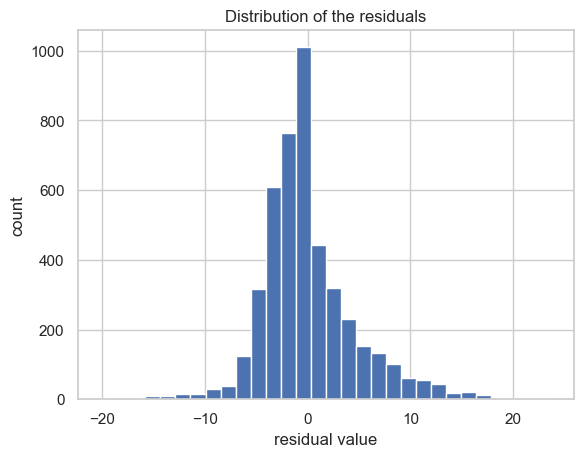

In [96]:
#visualsie the residual
plt.hist(results["residual"], bins=30)
plt.title("Distribution of the residuals")
plt.xlabel("residual value")
plt.ylabel("count")
plt.show()

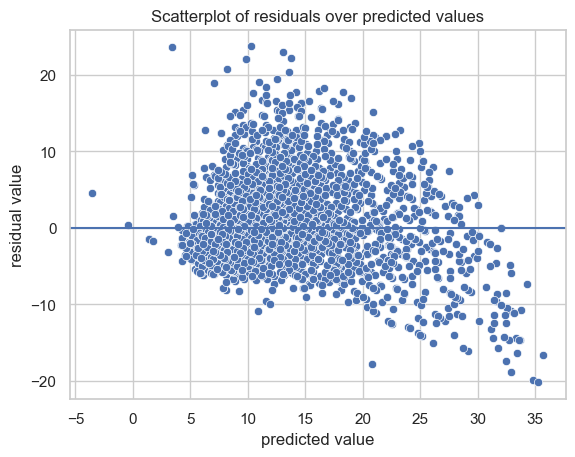

In [97]:
# to visualise residual over predicted
sns.scatterplot(x="predicted", y="residual", data=results)
plt.axhline(0)
plt.title("Scatterplot of residuals over predicted values")
plt.xlabel("predicted value")
plt.ylabel("residual value")
plt.show()

In [ ]:
#Takeways
